# Exercício de Programação: Regressão Polinomial e Curvas de Aprendizado

Este exercício aborda os conceitos de Regressão Polinomial e Curvas de Aprendizado.

**Objetivos:**
1. Gerar dados sintéticos a partir de uma função quadrática.
2. Ajustar modelos de Regressão Polinomial de diferentes graus aos dados.
3. Visualizar e interpretar as curvas de aprendizado para modelos que estão subajustando (underfitting) e sobreajustando (overfitting).

## Configuração Inicial

Primeiro, vamos importar as bibliotecas necessárias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Um pipeline serve para ligar várias etapas do processo de machine learning em sequência:
# por exemplo, padronizar os dados → treinar o modelo → avaliar o resultado.
from sklearn.pipeline import make_pipeline

# Calcula e retorna os dados para construir uma curva de aprendizado.
# A curva de aprendizado (learning curve) mostra como o desempenho do modelo muda
# à medida que ele é treinado com mais dados.
from sklearn.model_selection import learning_curve

# Calcula o erro quadrático médio (MSE) entre os valores reais e os previstos.
# É uma métrica de avaliação usada principalmente em problemas de regressão.
from sklearn.metrics import mean_squared_error

## Parte 1: Gerar Dados Sintéticos

Nesta seção, você irá gerar um conjunto de dados não linear com base em uma função quadrática. A ideia é criar dados que um modelo linear simples não conseguiria ajustar bem, necessitando de uma abordagem polinomial.

**Instruções:**
- Crie 100 instâncias.
- O atributo `X` deve ser um array de números aleatórios entre -5 e 5.
- O alvo `y` deve ser calculado usando a fórmula: `y = 2 * X**2 + 3 * X + 5 + ruído`, onde `ruído` é um ruído gaussiano (normal padrão) multiplicado por 5 (use `np.random.randn`).

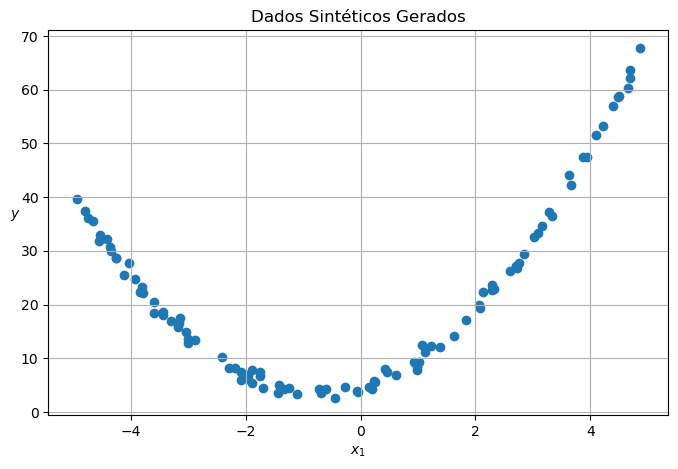

In [2]:
np.random.seed(42)
m = 100

# np.random.rand(m,1) gera números entre 0 e 1 (intervalo = 1 unidade).
# Multiplicando por um valor A, o intervalo vai de 0 a A (tamanho do intervalo = A).
# Subtraindo B, você desloca o intervalo para [-B, A-B].
X = 10 * np.random.rand(m, 1) - 5
y = 2 * X ** 2 + 3 * X + 5 + np.random.randn(m, 1)

# Plotando os dados gerados
plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.title("Dados Sintéticos Gerados")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid(True)
plt.show()

## Parte 2: Ajustar Modelos de Regressão Polinomial

Agora, vamos usar a classe `PolynomialFeatures` do Scikit-Learn para criar modelos de regressão polinomial de diferentes graus e visualizar como eles se ajustam aos dados.

**Instruções:**
- Crie e ajuste três modelos de regressão polinomial:
  1. Grau 1 (um modelo linear simples).
  2. Grau 2 (um modelo quadrático, que deve se ajustar bem).
  3. Grau 300 (um modelo de grau muito alto, para demonstrar o sobreajuste).
- Plote as predições de cada modelo sobre os dados originais.

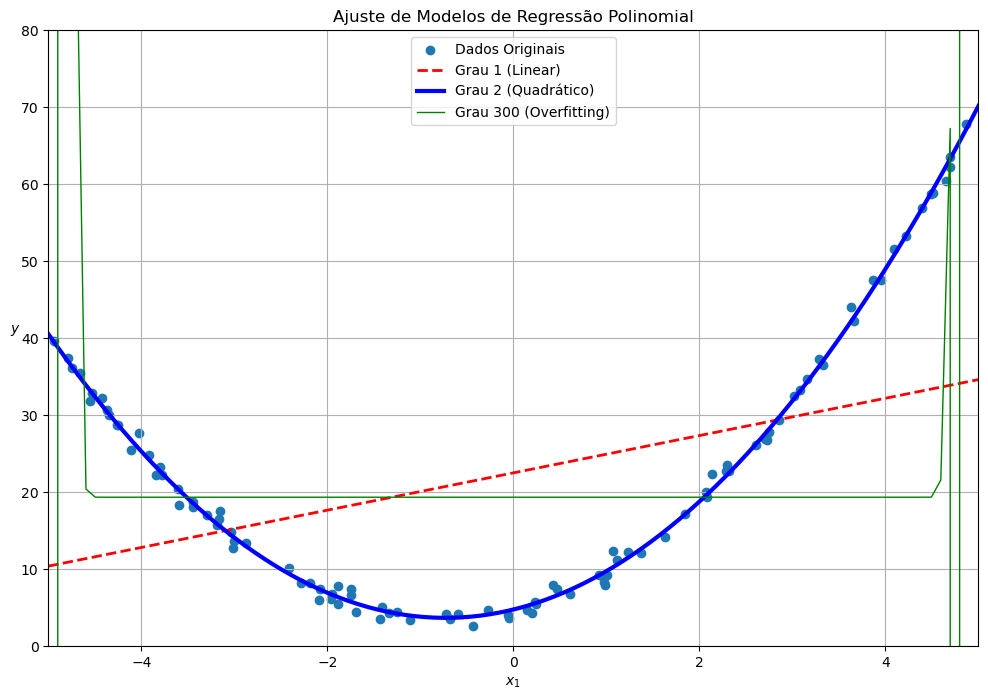

In [3]:
#Cria uma nova figura para o gráfico com tamanho 12x8 polegadas.
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label="Dados Originais")

# Criando pontos para plotar as curvas dos modelos
# np.linspace(-5, 5, 100) cria 100 pontos igualmente espaçados entre -5 e 5.
# .reshape(100, 1) transforma esses pontos em uma coluna, como o modelo espera para previsão.
# Esses pontos serão usados para desenhar as curvas dos modelos ajustados.
X_new = np.linspace(-5, 5, 100).reshape(100, 1)

# Criando e ajustando um modelo para o grau 1
# Dica: usar make_pipeline com PolynomialFeatures(degree=1) e LinearRegression
#Cria um pipeline (uma sequência de passos) para regressão polinomial de grau 1 (linear).
# PolynomialFeatures(degree=1) transforma os dados em termos polinomiais (grau 1 = linear).
# include_bias=False significa que não adiciona o termo constante 1, porque o LinearRegression 
#### OBS: include_bias sempre é False quando se usar LinearRegression() pois o linar regression ja inclue o
#### termo de vies (intercepto)
# já cuida disso.
# LinearRegression() é o modelo de regressão linear que vai aprender os parâmetros.
poly_reg_1 = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LinearRegression())

# Ajusta (treina) o modelo linear nos dados X e y.
# O modelo aprende a melhor linha que aproxima os pontos.
poly_reg_1.fit(X, y)

# ela pede para o modelo prever quais seriam os valores de saída (y) 
# correspondentes aos novos valores de entrada (X_new).
y_new_1 = poly_reg_1.predict(X_new)

# Plota a curva do modelo linear em vermelho (r), tracejada (--), com largura da linha 2.
# label é usado na legenda.
plt.plot(X_new, y_new_1, "r--", linewidth=2, label="Grau 1 (Linear)")

# TODO: Crie e ajuste um modelo para o grau 2
# Dica: use make_pipeline com PolynomialFeatures(degree=2) e LinearRegression
poly_reg_2 = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_reg_2.fit(X, y)
y_new_2 = poly_reg_2.predict(X_new)
plt.plot(X_new, y_new_2, "b-", linewidth=3, label="Grau 2 (Quadrático)")

# TODO: Crie e ajuste um modelo para o grau 300
# Dica: use make_pipeline com PolynomialFeatures(degree=300) e LinearRegression
poly_reg_300 = make_pipeline(PolynomialFeatures(degree=300, include_bias=False), LinearRegression())
poly_reg_300.fit(X, y)
y_new_300 = poly_reg_300.predict(X_new)
plt.plot(X_new, y_new_300, "g-", linewidth=1, label="Grau 300 (Overfitting)")

# Finalizando o gráfico
plt.title("Ajuste de Modelos de Regressão Polinomial")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend()
plt.axis([-5, 5, 0, 80])
plt.grid(True)
plt.show()

## Parte 3: Curvas de Aprendizado para um Modelo com Subajuste (Underfitting)

As curvas de aprendizado são uma ferramenta importante para diagnosticar se um modelo está com subajuste, sobreajuste ou se está adequado. Elas plotam o erro do modelo nos dados de treino e de validação em função do tamanho do conjunto de treinamento.

**Instruções:**
- Use a função `learning_curve` do Scikit-Learn para gerar os dados das curvas de aprendizado para um modelo de **Regressão Linear** simples.
- Plote as curvas (erro de treino vs. erro de validação).

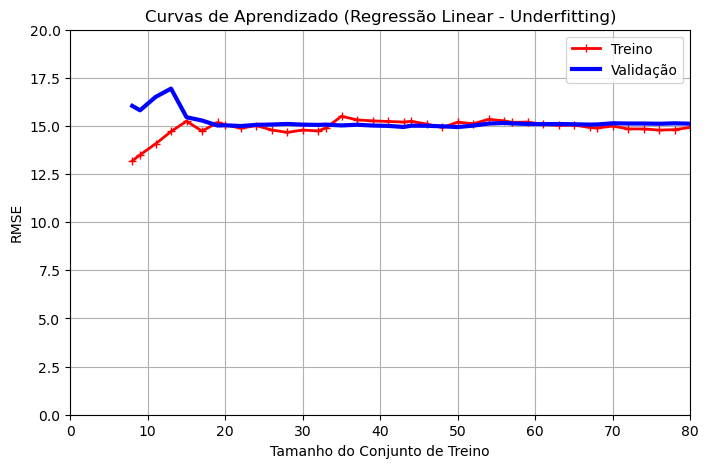

In [4]:
# Importa a função learning_curve, que faz o trabalho de treinar o modelo várias vezes com 
# tamanhos diferentes do conjunto de treino e calcular os erros.
from sklearn.model_selection import learning_curve


# LinearRegression() → o modelo que será testado.
# X e y → seus dados de entrada e saída.
# train_sizes=np.linspace(0.01, 1.0, 40) → cria 40 tamanhos diferentes de conjunto de treino,
# de 1% até 100% dos dados.
# cv=5 → usa validação cruzada com 5 divisões (treina 5 vezes trocando os dados de teste).
# scoring="neg_root_mean_squared_error" → mede o erro do modelo usando o RMSE (Root Mean Squared Error).
# O valor é negativo porque o Scikit-learn usa uma convenção onde quanto maior o score, melhor, então 
# ele inverte o sinal dos erros.
# O resultado:
# train_sizes → os tamanhos de treino testados (ex: 10%, 20%, 30%...).
# train_scores → erros médios obtidos no treino.
# valid_scores → erros médios obtidos na validação.
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 40),
        cv=5, scoring="neg_root_mean_squared_error")

    # Como o Scikit-learn retornou valores negativos, colocamos - na frente para torná-los positivos
    # (RMSE normal).
    # mean(axis=1) → calcula a média dos erros ao longo das 5 divisões (cv=5).
    # Agora temos:
    # train_errors: erro médio no treino
    # valid_errors: erro médio na validação
    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)

    # Cria o gráfico com tamanho 6x4 (só estética).
    plt.figure(figsize=(8, 5))

    
    # Plota duas curvas:
    # Vermelha (r-+) → erro de treino
    # Azul (b-) → erro de validação
    # Conforme o conjunto de treino cresce, você vê como o erro muda.
    plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Treino")
    plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validação")
    plt.xlabel("Tamanho do Conjunto de Treino")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.legend()
    plt.axis([0, 80, 0, 20])


# Criando o modelo e chamando a função
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

plt.title("Curvas de Aprendizado (Regressão Linear - Underfitting)")
plt.show()

# Se ambas são altas → o modelo é simples demais → underfitting.
# Se linha vermelha é baixa, mas azul é alta → o modelo é complexo demais → overfitting.
# Se ambas são baixas e próximas → o modelo está bem ajustado.

**Análise das Curvas de Aprendizado (Regressão Linear):**

As curvas de aprendizado para o modelo linear mostram um comportamento típico de subajuste (underfitting). Ambas as curvas (treino e validação) atingem um platô, ficando próximas uma da outra, mas com um erro relativamente alto. Isso indica que o modelo é muito simples para capturar a complexidade dos dados, e adicionar mais exemplos de treino não melhorará o desempenho.

## Parte 4: Curvas de Aprendizado para um Modelo com Sobreajuste (Overfitting)

Agora, vamos ver como são as curvas de aprendizado para um modelo complexo que sobreajusta os dados.

**Instruções:**
- Crie um pipeline para um modelo de **Regressão Polinomial de grau 10**.
- Use a mesma função `plot_learning_curves` para gerar e plotar as curvas de aprendizado.

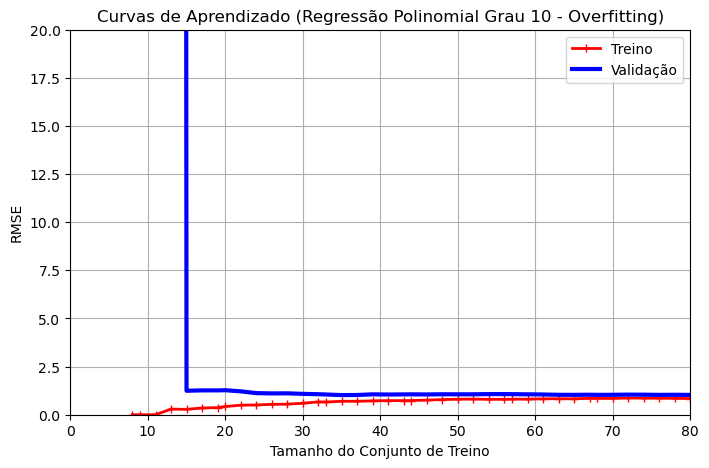

In [5]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

plot_learning_curves(polynomial_regression, X, y)
plt.title("Curvas de Aprendizado (Regressão Polinomial Grau 10 - Overfitting)")
plt.show()

**Análise das Curvas de Aprendizado (Regressão Polinomial):**

As curvas para o modelo polinomial de grau 10 mostram um comportamento clássico de sobreajuste (overfitting). O erro no conjunto de treino é muito baixo e permanece assim. No entanto, o erro no conjunto de validação é significativamente maior, e há uma grande lacuna (gap) entre as duas curvas. Isso significa que o modelo se ajustou muito bem aos dados de treino, mas não consegue generalizar para novos dados (dados de validação). Adicionar mais dados de treino poderia ajudar a fechar essa lacuna.